<<`QUESTION 3`>>### **Change get_ds and get_dl functions by getting CIFAR10, CIFAR100, and one more (as you wish) dataset from torchvision.datasets library. Check documentation of torchvision.datasets library using this link.**

In [ ]:
import torch
from torchvision.datasets import CIFAR10, CIFAR100, FashionMNIST # import datasets

# Analyze CIFAR10 dataset

train_data = CIFAR10(root = 'data', train = True, download = True)
test_data = CIFAR10(root = 'data', train = False, download = True)

# Analyze CIFAR100 dataset

train_data_two = CIFAR100(root = 'data', train = True, download = True)
test_data_two = CIFAR100(root = 'data', train = False, download = True)

# Analyze FashionMNIST dataset

fashion_train_dataset = FashionMNIST(root = 'data', train = True, download = True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


My CIFAR10 has 50000 train and 10000 test data.
My CIFAR100 has 50000 train and 10000 test data.
CIFAR10 : <class 'int'>
CIFAR100: <class 'int'>
CIFAR10 IMAGE:


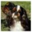

CIFAR100 IMAGE:


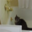

In [ ]:

print(f'My CIFAR10 has {len(train_data)} train and {len(test_data)} test data.') # print CIFAR10 datasets

print(f'My CIFAR100 has {len(train_data_two)} train and {len(test_data_two)} test data.')  # print CIFAR100 datasets

data_image_CIFAR10,GT_CIFAR10 = train_data[500] # get 500th image of CIFAR10

data_image_CIFAR100,GT_CIFAR100 = train_data[253] # get 253rd image of CIFAR100

print(f'CIFAR10 : {type(GT_CIFAR10)}')
print(f'CIFAR100: {type(GT_CIFAR100)}')

print("CIFAR10 IMAGE:")
display(data_image_CIFAR10)

print("CIFAR100 IMAGE:")
display(data_image_CIFAR100)

In [ ]:
# CIFAR10 dataset 

from torchvision import transforms as T

def get_dl(root):
   new_structure = T.Compose([
       T.RandomGrayscale(),
       T.ToTensor(),
       T.Resize(100)
   ])
   train_data = CIFAR10(root = 'data', train = True, download = True, transform = new_structure)
   test_data = CIFAR10(root = 'data', train = False, download = True) 

   return train_data, test_data
new_data, test_data = get_dl('data')



   


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# CIFAR100 dataset 

from torchvision import transforms as T

def get_dl_two(root):
   new_structure_two = T.Compose([
       T.RandomGrayscale(),
       T.ToTensor(),
       T.RandomHorizontalFlip()
   ])
   train_data_two = CIFAR100(root = 'data', train = True, download = True, transform = new_structure_two)
   test_data_two = CIFAR100(root = 'data', train = False, download = True) 

   return train_data_two, test_data_two
new_data_two, test_data_two = get_dl_two('data')


Files already downloaded and verified
Files already downloaded and verified


<<`QUESTION 4`>> ### **Change “drop_last” argument in torch.utils.data.DataLoader class and see how the length of data loaders change in the three datasets from problem#3.**


In [ ]:
#Drop_Last -> The drop_last=True parameter ignores the last batch (when the number of examples in your dataset is 
#not divisible by your batch_size) while drop_last=False will make the last batch smaller than my batch_size .
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset


# CIFAR10 dataset: testing drop_last with train set

BATCH_SIZE = 128 
dt_T = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, drop_last = True)
print(f'CIFAR10 drop_last = TRUE : {len(dt_T)}') # output : 390 bcz my train_data = 50000 and batches 128 : 50000 / 128 = 390 but drop value : -80 less 49920

dt_F = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, drop_last = False)
print(f'CIFAR10 drop_last = FALSE : {len(dt_T)}\n') # output : 391 bcz my train_data = 50000 and batches 128 : 50000 / 128 = 391 but drop value : +48 more 50048

# CIFAR100 dataset: testing drop_last with test set

BATCH_SIZE_two = 32 
dt_T_two = DataLoader(dataset = test_data_two, batch_size = BATCH_SIZE_two, drop_last = True)
print(f'CIFAR100 drio_last = TRUE :{len(dt_T_two)}') # output : 390 bcz my train_data = 10000 and batches 32 : 10000 / 32 = 312 but drop value : -16 less 9984

dt_F_two = DataLoader(dataset = test_data_two, batch_size = BATCH_SIZE_two, drop_last = False)
print(f'CIFAR100 drio_last = FALSE :{len(dt_T_two)}\n') # output : 391 bcz my train_data = 10000 and batches 32 : 10000 / 32 = 313 but drop value : +16 more 10016

# FashionMNIST dataset: testing drop_last with train set

BATCH_SIZE_three = 256 
fashion_T_three = DataLoader(dataset = fashion_train_dataset, batch_size = BATCH_SIZE_three, drop_last = True)
print(f'FashionMNIST drop_last = TRUE :{len(fashion_T_three)}') # 234 * 256 = 59904 and '- 96'

fashion_T_three = DataLoader(dataset = fashion_train_dataset, batch_size = BATCH_SIZE_three, drop_last = False)
print(f'FashionMNIST drop_last = FALSE :{len(fashion_T_three)}') # 235 * 256 = 60160 '+160'

CIFAR10 drop_last = TRUE : 390
CIFAR10 drop_last = FALSE : 390

CIFAR100 drio_last = TRUE :312
CIFAR100 drio_last = FALSE :312

FashionMNIST drop_last = TRUE :234
FashionMNIST drop_last = FALSE :235


*<<`QUESTION 05`>>* **Change “shuffle” argument in the torch.utils.data.DataLoader class and try to visualize images
using next(iter(tr_dl)) and see how the order of images in the dataloader change.**

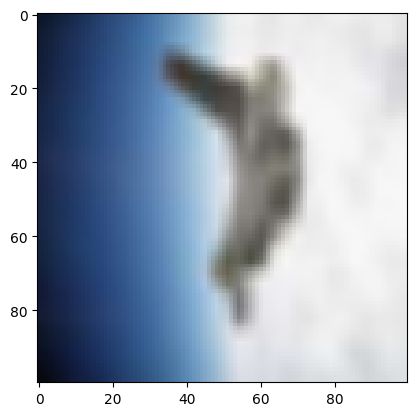

In [ ]:
# Shuffle : when we use batches and if the computer have to analyze certain amount of data, sometimes we have one proplem that is 
#similarity of data. In order to predict better, we have to use shuffle in train set. And we can analyze and make better models.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BATCH_SIZE = 128 

dt_T = DataLoader(dataset = new_data, batch_size = BATCH_SIZE, drop_last = True, shuffle = True)
images, labels = next(iter(dt_T)) # image output: torch.Size([128, 3, 100, 100])

torch_image = torch.squeeze(images[0]) # output: torch.Size([3, 100, 100]) squeeze I used to delete one dimension '128'
image = torch_image.numpy()

plt.imshow(image.T) # not it is 3MN to change MN3 I have to use '.T'
plt.show()
# here I used shuffle = True and even If i update or run my code the output image will be different every time.
# if I make shuffle = False, the result is the same

# CIFAR 100 dataset example : here is the same result, but when I make shuffle 'False', the data inside my dataset will not shuffle
#BATCH_SIZE_two = 32

#dt_T_two = DataLoader(dataset = new_data_two, batch_size = BATCH_SIZE_two, drop_last = True, shuffle = False)
#images_two, labels_two = next(iter(dt_T_two)) 

#torch_image_two = torch.squeeze(images[0])
#image_two = torch_image_two.numpy()

#plt.imshow(image_two.T)
#plt.show()